In [1]:
import os
import numpy as np
import imageio.v3 as iio
import torch
from torch.utils.data import DataLoader
from hmdb import HMDBFrame


In [3]:
# Instantiate the dataset.
# Make sure that the 'datapath' points to your video directory.
dataset = HMDBFrame(split='train_near_ood', cfg=None, dataset='HMDB', datapath='/media/volume/HMDB51_video/video')
print("Total frames available:", len(dataset))

# Create a DataLoader with batch_size=1 (to retrieve one frame per batch)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Retrieve one batch (i.e., one frame).
batch = next(iter(dataloader))
frame = batch['inputs']         # This is a tensor (or numpy array) containing the frame.
video_file = batch['video_file']
frame_idx = batch['frame_idx']

print("One frame from the DataLoader:")
print("  Video file:", video_file[0])
print("  Frame index:", frame_idx[0])
print("  Frame shape:", frame[0].shape)


Total frames in dataset: 186436
Total frames available: 186436
One frame from the DataLoader:
  Video file: /media/volume/HMDB51_video/video/brush_hair/Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_med_0.avi
  Frame index: tensor(0)
  Frame shape: torch.Size([3, 240, 320])


In [4]:
print(len(batch))

4


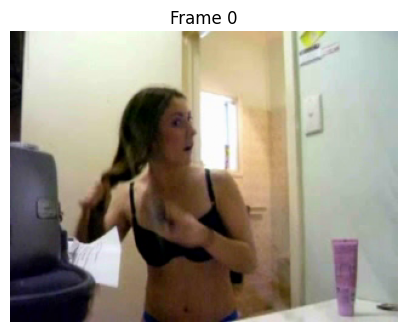

In [5]:
import matplotlib.pyplot as plt

# We take the first frame.
frame_tensor = frame[0].cpu()  # move the tensor to CPU

# Convert the tensor to a NumPy array.
frame_np = frame_tensor.numpy()

# The frame has shape (C, H, W), convert it to (H, W, C) for matplotlib.
if frame_np.ndim == 3 and frame_np.shape[0] == 3:
    frame_np = frame_np.transpose(1, 2, 0)

plt.figure(figsize=(5, 5))
plt.imshow(frame_np)
plt.title("Frame 0")
plt.axis("off")
plt.show()